---
layout: default
title: "Deep Learning - RNN architectures"
categories: deeplearning
permalink: /ML44/
order: 44
comments: true
---

In [1]:
%pylab --no-import-all inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rcParams["mathtext.fontset"] = "cm"
from matplotlib.patches import Rectangle, Circle
from mpl_flow import Flow

Populating the interactive namespace from numpy and matplotlib


# RNN architectures
In <a href="page:ML43">ML-43</a> we have seen an RNN architecture where $T_x = T_y$. For most applications, this is not the case and the basic RNN architecture that we have seen in <a href="page:ML43">ML-43</a>  can be modified to map sequence-related $x$ and $y$ with different shapes.

## IO relationship
The basic RNN architecture that we have seen in <a href="page:ML43">ML-43</a> maps many input to as many outputs and it is therefore called a Many-to-Many architecture (<a href="#fig:rnnarchitectures">figure below</a>, top-right panel))

### One-to-One
A one-to-one architecture maps an input $x$ to an output $y$ in a single time-step and it is a limit case, which is identical to a classical (non-recurrent) neural network <a href="#fig:rnnarchitectures">figure below</a>, top-left panel)

### Many-to-One
Suppose we want to train an RNN for a sentiment classification task where, given an sentence $x$, the task is to produce a number $y$ indicating how good is the sentiment that the sentence expresses. For example, we could have movie reviews as input and the task is to tell if the review is good or bad. The words of the input review are parsed in subsequent time-steps, but only one output is produced at the end of the process (<a href="#fig:rnnarchitectures">figure below</a>, bottom-left panel)  This is a Many-to-One architecture where we want to map mulitple inputs (multiple words in a sentence) to a single output (the review mark).

### One-to-Many
Suppose we want to create a music generation algorithm, where the goal is for the RNN to output a set of notes from a single number input, representing for example the music genre. 

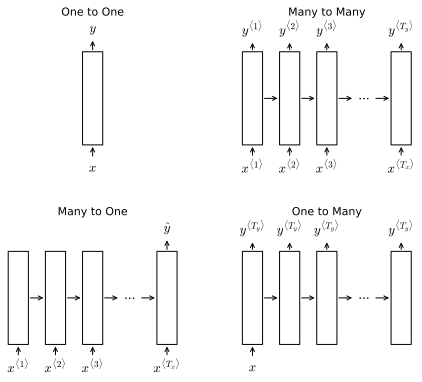

In [79]:
fig = plt.figure(figsize=(7, 6.5))
gs = fig.add_gridspec(2, 2, wspace=.5, hspace=.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

def many_to_one(ax):
    ax.set_title('Many to One', fontsize=11)
    f = Flow(bbox=dict(boxstyle='square'), figsize=(4,4), ax=ax)
    for i in range(1, 6):
        lbl = i if i < 5 else 'T_x'

        if i != 4:
            f.node(f'a{i}', label='\n'*5+' '*3, fontsize=13, startpoint=f'a{i-1}')
        else:
            f.node(f'a{i}', label='$\\cdots$', startpoint=f'a{i-1}', fontsize=13, bbox=dict(ec='none'))

        if i >0 and i != 4:
            f.node(f'x{i}', label=f'$x^{{\\langle {lbl} \\rangle}}$', startpoint=f'a{i}', travel='s', fontsize=13, 
                   edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), bbox=dict(ec='none'))

    f.node(f'y{i}', label=f'$\\hat{{y}}$', startpoint=f'a{i}', travel='n', fontsize=13,
           bbox=dict(ec='none'))

def many_to_many(ax, steps):
    howmuch = 'Many' if steps > 1 else 'One'
    ax.set_title(f'{howmuch} to {howmuch}', fontsize=11)
    f = Flow(bbox=dict(boxstyle='square'), figsize=(4,4), ax=ax)
    for i in range(1, steps+1):
        lbl = i if i < 5 else 'T_x'

        if i != 4:
            f.node(f'a{i}', label='\n'*5+' '*3, fontsize=13, startpoint=f'a{i-1}')
        else:
            f.node(f'a{i}', label='$\\cdots$', startpoint=f'a{i-1}', fontsize=13, bbox=dict(ec='none'))

        if i >0 and i != 4:
            supscript = f'^{{\\langle {lbl} \\rangle}}' if steps > 1 else ''
            f.node(f'x{i}', label=f'$x{supscript}$', startpoint=f'a{i}', travel='s', fontsize=13, 
                   edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), bbox=dict(ec='none')) 
            if i == 5:
                lbl = 'T_y'
                supscript = f'^{{\\langle {lbl} \\rangle}}' if steps > 1 else ''
            f.node(f'y{i}', label=f'$y{supscript}$', startpoint=f'a{i}', travel='n', fontsize=13,
                   bbox=dict(ec='none'))

def one_to_many(ax):
    ax.set_title('One to Many', fontsize=11)
    f = Flow(bbox=dict(boxstyle='square'), figsize=(4,4), ax=ax)
    for i in range(1, 6):
        lbl = i if i < 5 else 'T_x'

        if i != 4:
            f.node(f'a{i}', label='\n'*5+' '*3, fontsize=13, startpoint=f'a{i-1}')
        else:
            f.node(f'a{i}', label='$\\cdots$', startpoint=f'a{i-1}', fontsize=13, bbox=dict(ec='none'))

        if i == 1:
            f.node(f'x{i}', label=f'$x$', startpoint=f'a{i}', travel='s', fontsize=13, 
                   edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), bbox=dict(ec='none')) 
        if i > 0 and i != 4:
            
            f.node(f'y{i}', label=f'$y^{{\\langle T_y \\rangle}}$', startpoint=f'a{i}', travel='n', fontsize=13,
                   bbox=dict(ec='none'))
    
many_to_many(ax1, 1)
many_to_many(ax2, 5)
many_to_one(ax3)
one_to_many(ax4)

<i id="fig:rnnarchitectures">different RNN architectures</i>